In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sph6004-assessment1-mimic-iv/Assignment_1_data.csv


# 1. Data read

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
path = '../input/sph6004-assessment1-mimic-iv/'
df = pd.read_csv(path+'Assignment_1_data.csv')
df

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,M,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,NaN,3459.0,2.0,0.0,NaN,1.0,0.0,1.0,3,False
1,M,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,NaN,2020.0,NaN,1.0,NaN,1.0,1.0,1.0,8,False
2,M,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,NaN,3050.0,NaN,1.0,0.0,1.0,1.0,0.0,4,False
3,M,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,NaN,1592.0,NaN,0.0,NaN,0.0,0.0,1.0,6,False
4,M,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,NaN,339.0,2.0,0.0,0.0,4.0,1.0,3.0,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,F,84.952721,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,NaN,697.0,NaN,0.0,0.0,1.0,4.0,1.0,10,False
36485,F,30.583263,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,NaN,2000.0,NaN,0.0,NaN,1.0,1.0,0.0,0,False
36486,F,60.095765,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,NaN,3500.0,NaN,0.0,NaN,1.0,0.0,0.0,3,False
36487,M,78.847051,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,NaN,1900.0,NaN,0.0,NaN,0.0,1.0,0.0,5,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      36489 non-null  object 
 1   age                         36489 non-null  float64
 2   heart_rate_min              36417 non-null  float64
 3   heart_rate_max              36417 non-null  float64
 4   heart_rate_mean             36417 non-null  float64
 5   mbp_min                     36401 non-null  float64
 6   mbp_max                     36401 non-null  float64
 7   mbp_mean                    36401 non-null  float64
 8   sbp_min                     36343 non-null  float64
 9   sbp_max                     36343 non-null  float64
 10  sbp_mean                    36343 non-null  float64
 11  dbp_min                     36341 non-null  float64
 12  dbp_max                     36341 non-null  float64
 13  dbp_mean                    363

In [4]:
df.describe()

,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,sbp_mean,...,bilirubin_indirect_max,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index
count,36489.000000,36417.000000,36417.000000,36417.000000,36401.000000,36401.000000,36401.000000,36343.000000,36343.000000,36343.000000,...,1544.000000,1544.000000,35073.000000,7587.000000,36235.000000,18590.000000,36402.000000,36468.000000,36467.000000,36489.000000
mean,65.907162,70.935003,103.109572,84.855578,60.429777,105.484634,79.255689,94.449898,147.691412,119.757827,...,1.855894,1.742163,1914.991284,1.723738,0.481109,0.514094,1.060381,0.915433,0.826501,5.798104
std,16.797498,15.064109,20.682937,15.977454,13.347348,23.346984,11.758700,16.705217,22.855348,17.220898,...,2.293747,2.219434,1266.887914,0.588464,0.825034,0.963752,0.972511,1.050761,1.201510,3.014789
min,18.002527,9.000000,36.000000,28.500000,0.830000,51.000000,42.513889,2.000000,49.000000,40.000000,...,0.100000,0.100000,-14850.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.549252,60.000000,88.000000,73.321429,53.000000,91.000000,70.896552,83.500000,132.000000,107.096464,...,0.500000,0.500000,1050.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000
50%,67.439033,70.000000,101.000000,83.500000,60.000000,102.000000,77.851852,93.000000,146.000000,117.678571,...,1.000000,1.000000,1667.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000
75%,78.729524,80.000000,115.000000,95.250000,68.000000,115.000000,86.382353,104.000000,161.000000,130.649616,...,2.200000,2.000000,2500.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,102.865603,163.000000,295.000000,174.740741,133.000000,299.000000,151.529412,184.000000,352.000000,206.388889,...,21.200000,21.200000,31016.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000


In [5]:
df.columns

Index(['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean',
       'mbp_min', 'mbp_max', 'mbp_mean', 'sbp_min', 'sbp_max', 'sbp_mean',
       'dbp_min', 'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'lactate_min', 'lactate_max', 'ph_min', 'ph_max',
       'chloride_min', 'chloride_max', 'calcium_min', 'calcium_max',
       'sodium_min', 'sodium_max', 'glucose_min', 'glucose_max', 'wbc_min',
       'wbc_max', 'creatinine_min', 'creatinine_max', 'hemoglobin_min',
       'hemoglobin_max', 'total_protein_max', 'total_protein_min', 'pt_min',
       'pt_max', 'alt_max', 'alt_min', 'alp_max', 'alp_min', 'ast_min',
       'ast_max', 'bilirubin_total_max', 'bilirubin_total_min',
       'bilirubin_direct_max', 'bilirubin_direct_min',
       'bilirubin_indirect_max', 'bilirubin_indirect_min', 'urineoutput',
       'sofa_respiration', 'sofa_coagulation', 'sofa_liver',
       'sofa_cardiovascular', 'sofa_cns', 'sofa_renal',
       'charls

# 2. Explore Data Analysis (EDA)

## 2.1 Data cleaning

### 2.1.1 Handling outliers 

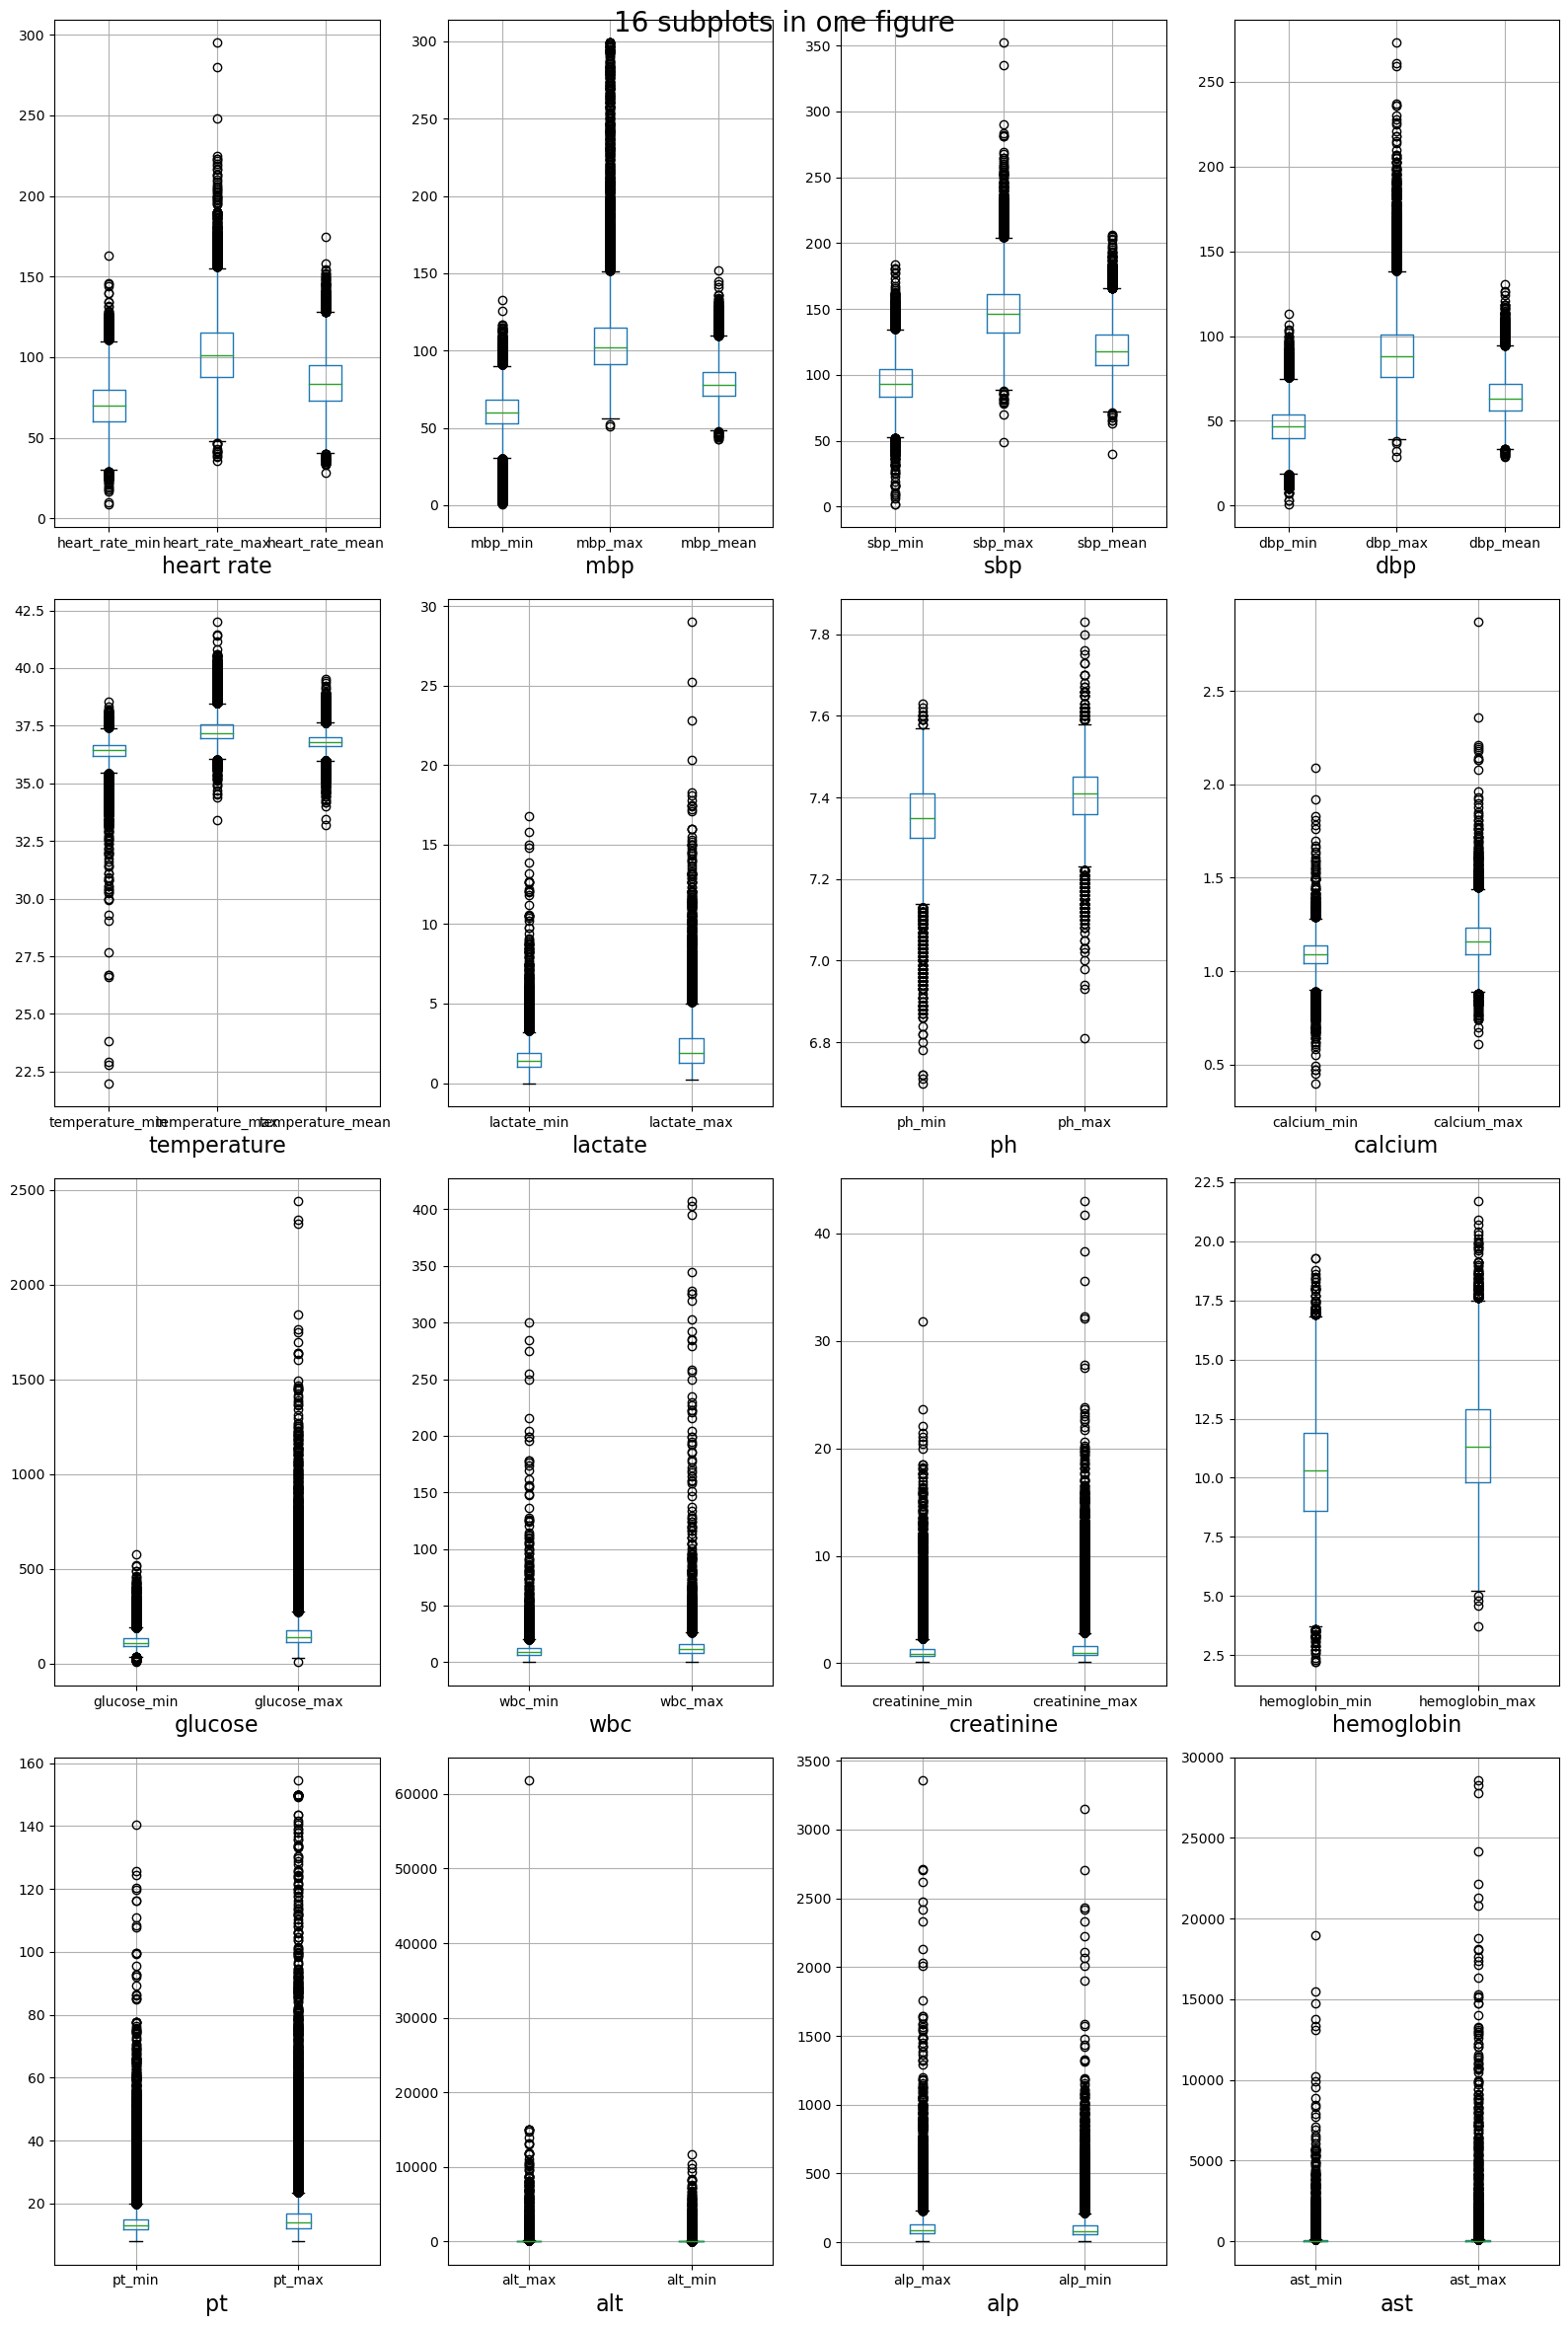

In [6]:
groups=[
    ["heart_rate_min", "heart_rate_max", "heart_rate_mean"],
    ["mbp_min", "mbp_max", "mbp_mean"],
    ["sbp_min", "sbp_max", "sbp_mean"],
    ["dbp_min", "dbp_max", "dbp_mean"],
    ["temperature_min", "temperature_max", "temperature_mean"],
    ['lactate_min', 'lactate_max'],
    ['ph_min', 'ph_max'],
    ['calcium_min', 'calcium_max'],
    ['glucose_min', 'glucose_max'],
    ['wbc_min','wbc_max'], 
    ['creatinine_min', 'creatinine_max'], 
    ['hemoglobin_min','hemoglobin_max'], 
    ['pt_min', 'pt_max'], 
    ['alt_max', 'alt_min'],
    ['alp_max','alp_min'], 
    ['ast_min', 'ast_max'], 
    ['bilirubin_total_max','bilirubin_total_min']
]

# 创建包含多个DataFrame的列表
df_list = []

# 循环创建DataFrame
for i in range(16):
    df_list.append(df.loc[:, groups[i]])
    
# 使用boxplot绘制箱线图
fig, axs = plt.subplots(nrows=4, ncols=4,figsize=(16, 24))
for i in range(16):
    df_list[i].boxplot(ax=axs[i//4,i%4])
    ax=axs[i//4,i%4].set_xlabel(' '.join(groups[i][0].split('_')[:-1]) ,fontsize=16 )


# 设置整个图的标题和布局
fig.suptitle("16 subplots in one figure",fontsize=20)
plt.tight_layout()
plt.show()

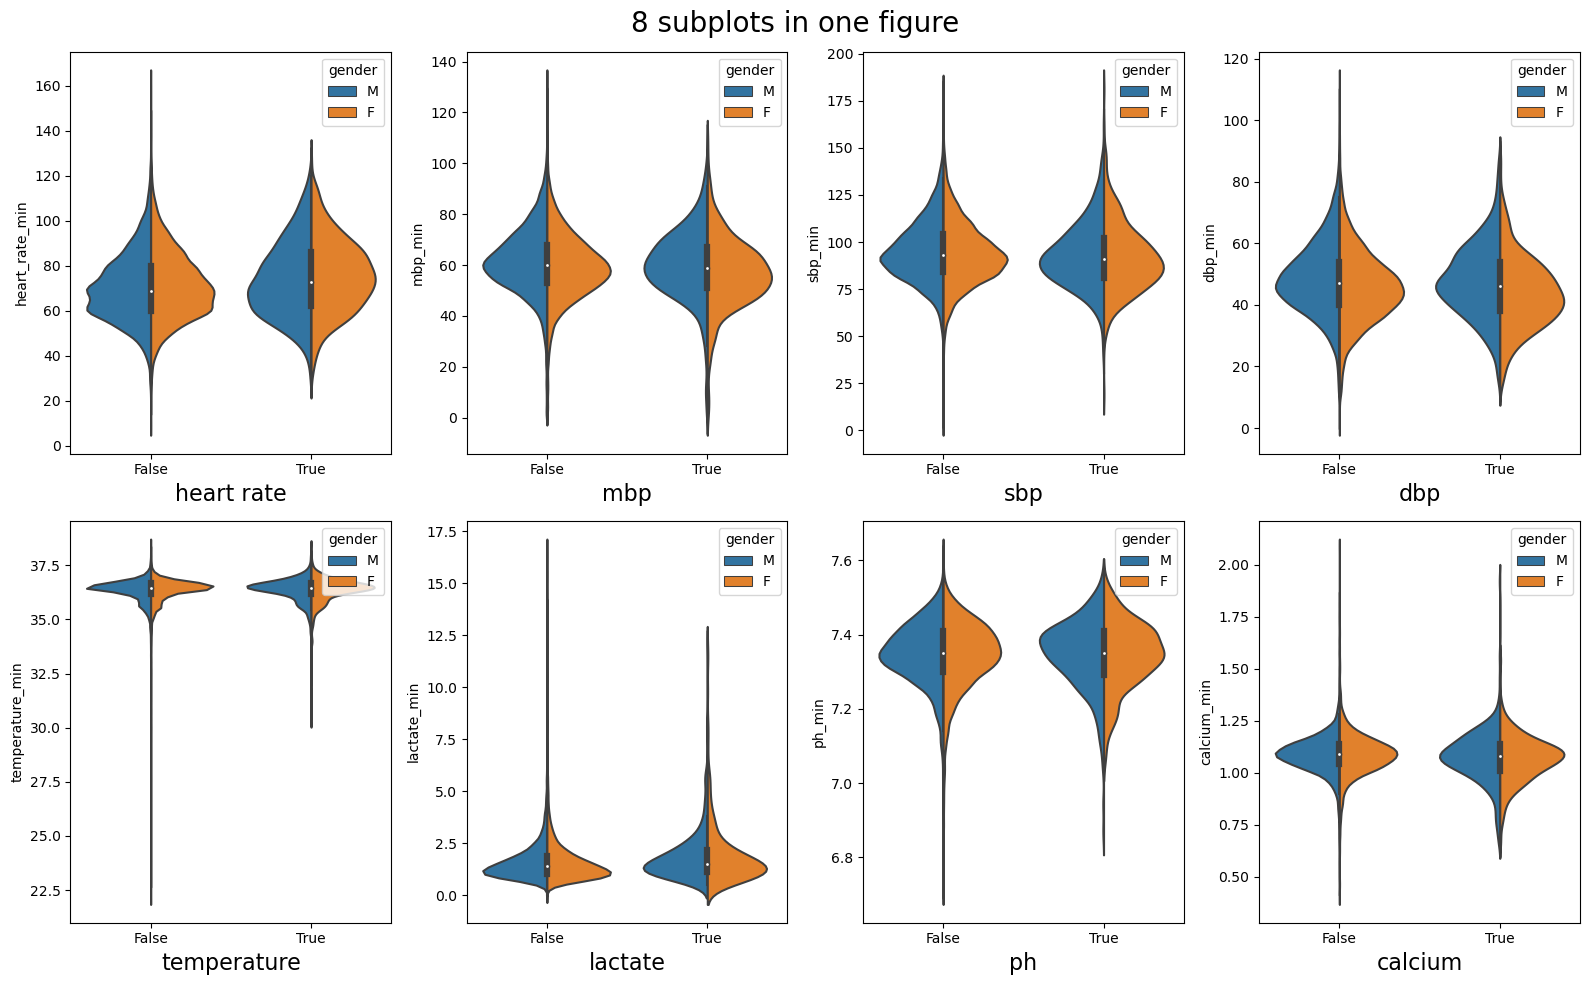

In [7]:
# gender 相关手风琴图，后面要用
fig, axs = plt.subplots(nrows=2, ncols=4,figsize=(16, 10))

for i in range(8):
    sns.violinplot(x="outcome",y=groups[i][0],data=df,hue="gender", split=True,showmedians=True, showextrema=False,ax=axs[i//4,i%4])
    ax=axs[i//4,i%4].set_xlabel(' '.join(groups[i][0].split('_')[:-1]) ,fontsize=16 )

# 设置整个图的标题和布局
fig.suptitle("8 subplots in one figure",fontsize=20)
plt.tight_layout()
plt.show()

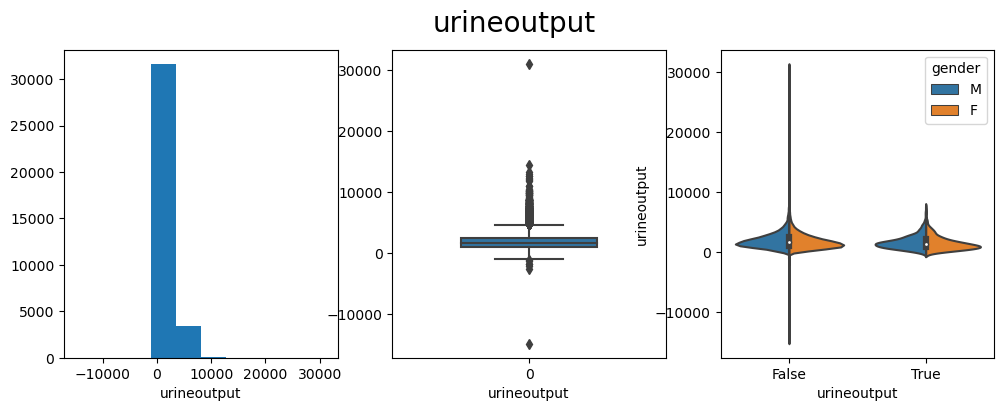

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(12, 4))

plt.subplot(131)
plt.hist(df['urineoutput'],linewidth=1 )
plt.xlabel("urineoutput") 
plt.subplot(132)
sns.boxplot(df['urineoutput'],width=0.5)
plt.xlabel("urineoutput") 
plt.subplot(133)
sns.violinplot(x="outcome",y='urineoutput',data=df,hue="gender", split=True,showmedians=True, showextrema=False)
plt.xlabel("urineoutput") 
fig.suptitle("urineoutput",fontsize=20)

plt.show()

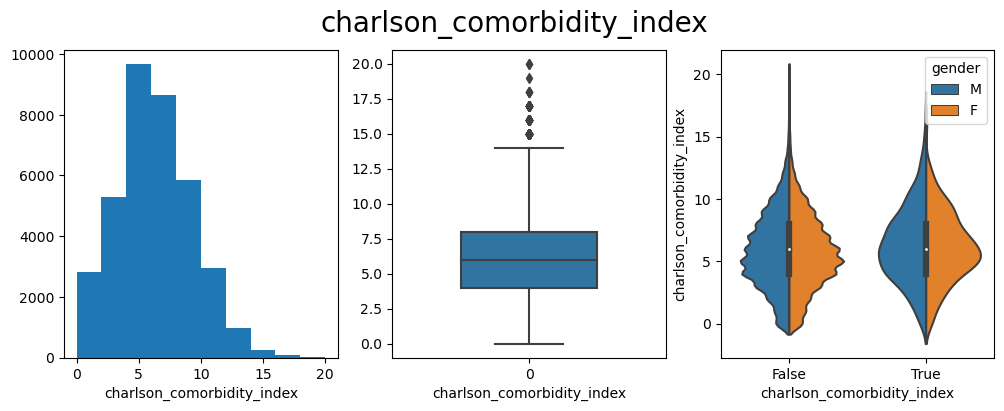

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(12, 4))

plt.subplot(131)
plt.hist(df['charlson_comorbidity_index'],linewidth=1 )
plt.xlabel("charlson_comorbidity_index")
plt.subplot(132)
sns.boxplot(df['charlson_comorbidity_index'],width=0.5)
plt.xlabel("charlson_comorbidity_index") 
plt.subplot(133)
sns.violinplot(x="outcome",y='charlson_comorbidity_index',data=df,hue="gender", split=True,showmedians=True, showextrema=False)
plt.xlabel("charlson_comorbidity_index") 
fig.suptitle("charlson_comorbidity_index",fontsize=20)

plt.show()

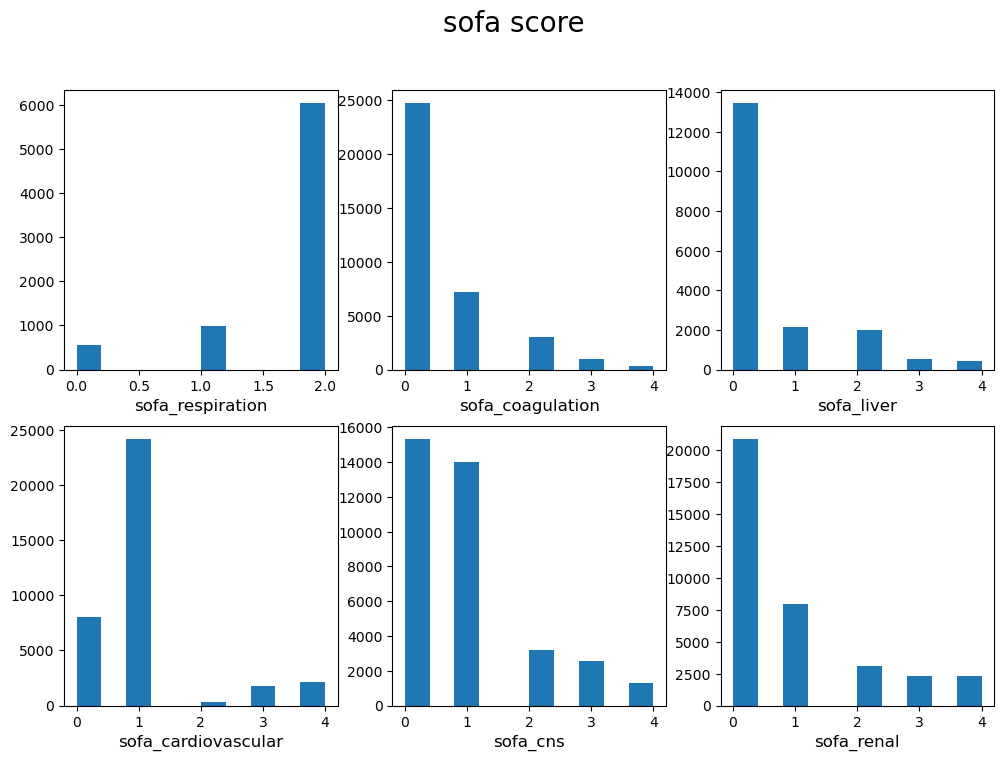

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=3,figsize=(12, 8))

sofa_cols=['sofa_respiration', 'sofa_coagulation', 'sofa_liver','sofa_cardiovascular', 'sofa_cns', 'sofa_renal']

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.hist(df[sofa_cols[i]])
    plt.xlabel(sofa_cols[i],fontsize=12)
    fig.suptitle("sofa score",fontsize=20)
plt.show()

In [11]:
# Treat outliers as missing values and hand them over to the missing value processing method
df['sbp_max'] = df['sbp_max'].mask((df['sbp_max'] > 350) | (df['sbp_max']<=0), np.nan)
df['alt_max'] = df['alt_max'].mask((df['alt_max'] > 20000) | (df['alt_max']<=0), np.nan)
df['urineoutput'] = df['urineoutput'].mask((df['urineoutput'] > 3000) | (df['urineoutput']<=0), np.nan)

### 2.1.2 Handling missing values

In [12]:
df.dropna(how = 'all')   
df.dropna(axis=1,how="all")   # Drop columns with all missing values

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,M,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,NaN,NaN,2.0,0.0,NaN,1.0,0.0,1.0,3,False
1,M,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,NaN,2020.0,NaN,1.0,NaN,1.0,1.0,1.0,8,False
2,M,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,NaN,NaN,NaN,1.0,0.0,1.0,1.0,0.0,4,False
3,M,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,NaN,1592.0,NaN,0.0,NaN,0.0,0.0,1.0,6,False
4,M,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,NaN,339.0,2.0,0.0,0.0,4.0,1.0,3.0,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,F,84.952721,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,NaN,697.0,NaN,0.0,0.0,1.0,4.0,1.0,10,False
36485,F,30.583263,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,NaN,2000.0,NaN,0.0,NaN,1.0,1.0,0.0,0,False
36486,F,60.095765,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,NaN,NaN,NaN,0.0,NaN,1.0,0.0,0.0,3,False
36487,M,78.847051,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,NaN,1900.0,NaN,0.0,NaN,0.0,1.0,0.0,5,False


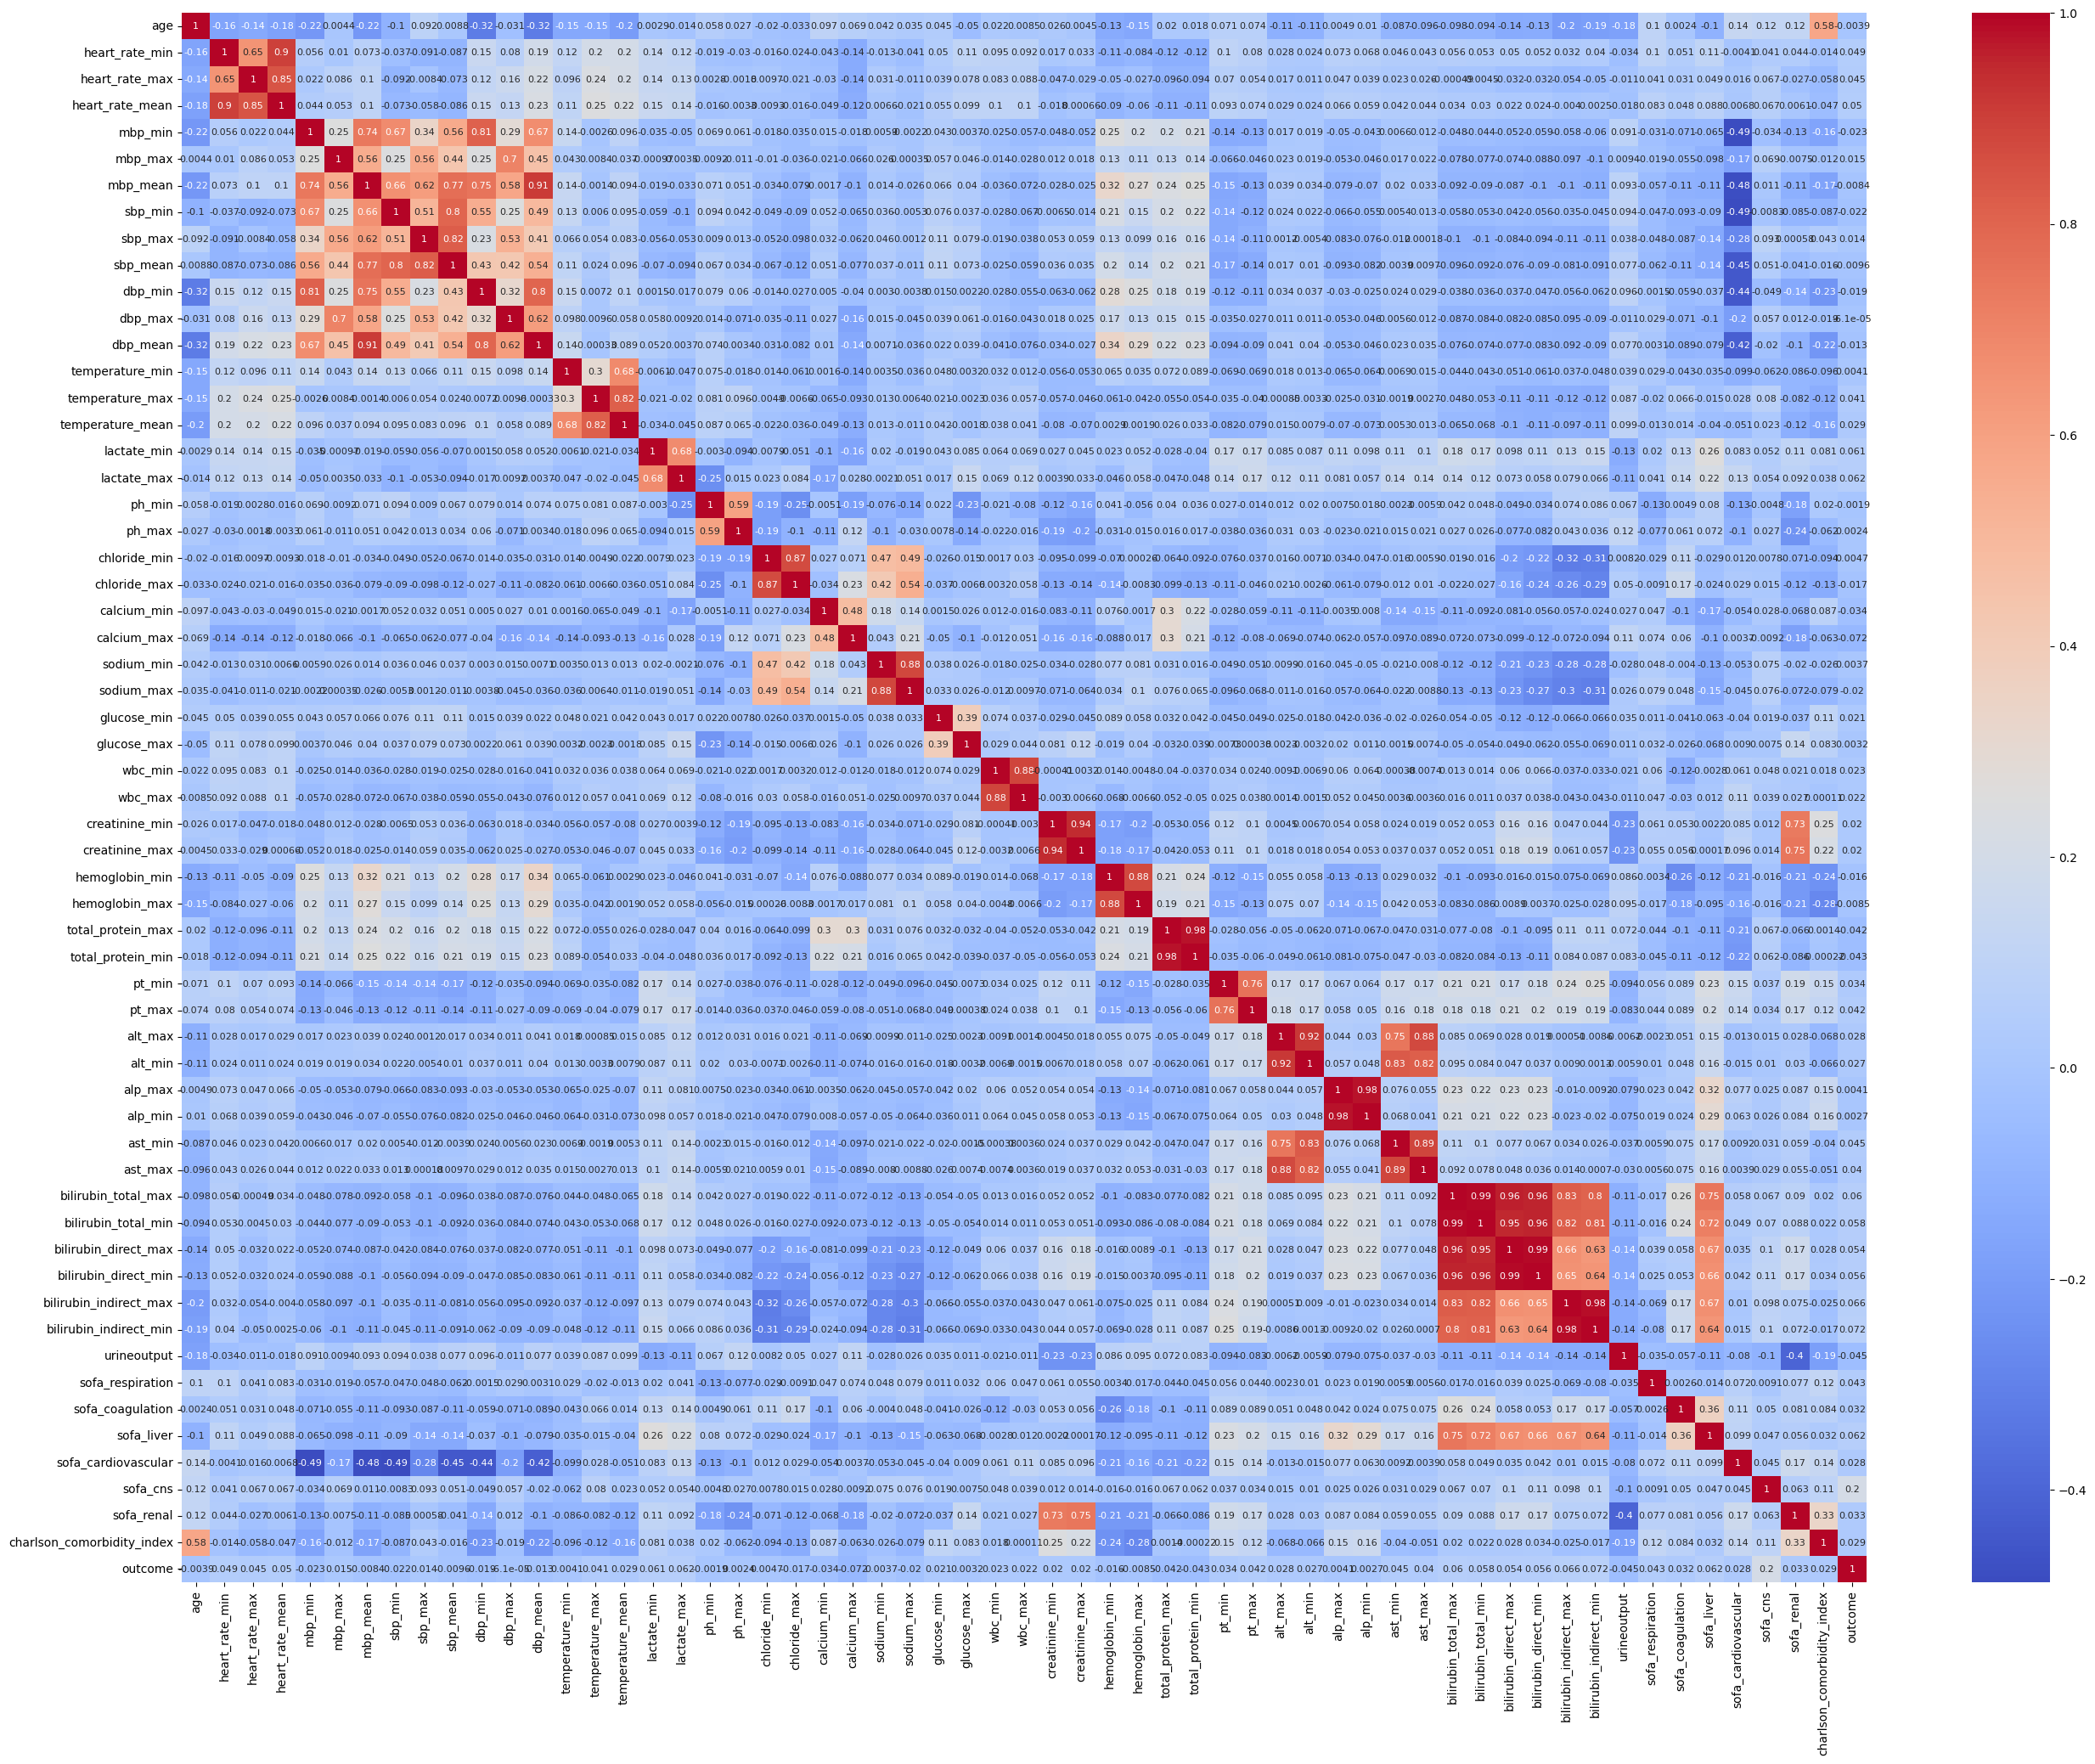

In [13]:
# Draw a correlation heat map
import seaborn as sns

plt.figure(figsize=[32, 24])
sns.heatmap(df.corr(), annot=True, annot_kws={"fontsize":8}, cmap="coolwarm")
plt.show()

In [14]:
# Drop features
na_df = df.isnull().sum()*100/len(df)
na_df

gender                         0.000000
age                            0.000000
heart_rate_min                 0.197320
heart_rate_max                 0.197320
heart_rate_mean                0.197320
mbp_min                        0.241169
mbp_max                        0.241169
mbp_mean                       0.241169
sbp_min                        0.400121
sbp_max                        0.402861
sbp_mean                       0.400121
dbp_min                        0.405602
dbp_max                        0.405602
dbp_mean                       0.405602
temperature_min                0.994820
temperature_max                0.994820
temperature_mean               0.994820
lactate_min                   56.343007
lactate_max                   56.343007
ph_min                        48.313190
ph_max                        48.313190
chloride_min                  83.203157
chloride_max                  83.203157
calcium_min                   74.543013
calcium_max                   74.543013


In [15]:
drop_cols = na_df[na_df > 70].keys()
drop_cols

Index(['chloride_min', 'chloride_max', 'calcium_min', 'calcium_max',
       'sodium_min', 'sodium_max', 'total_protein_max', 'total_protein_min',
       'bilirubin_direct_max', 'bilirubin_direct_min',
       'bilirubin_indirect_max', 'bilirubin_indirect_min', 'sofa_respiration'],
      dtype='object')

In [16]:
df = df.drop(columns = drop_cols)
na_df = df.isnull().sum()*100/len(df)
na_df

gender                         0.000000
age                            0.000000
heart_rate_min                 0.197320
heart_rate_max                 0.197320
heart_rate_mean                0.197320
mbp_min                        0.241169
mbp_max                        0.241169
mbp_mean                       0.241169
sbp_min                        0.400121
sbp_max                        0.402861
sbp_mean                       0.400121
dbp_min                        0.405602
dbp_max                        0.405602
dbp_mean                       0.405602
temperature_min                0.994820
temperature_max                0.994820
temperature_mean               0.994820
lactate_min                   56.343007
lactate_max                   56.343007
ph_min                        48.313190
ph_max                        48.313190
glucose_min                    0.816684
glucose_max                    0.816684
wbc_min                        0.696100
wbc_max                        0.696100


### 2.2.2 KNNImputer

In [17]:
from sklearn.impute import KNNImputer

In [18]:
# bp_cols
bp_cols=["mbp_min", "mbp_max", "mbp_mean","sbp_min", "sbp_max", "sbp_mean","dbp_min", "dbp_max", "dbp_mean"]

# Select these features and replace missing values with np.nan
selected_df_bp = df[bp_cols].replace("?", np.nan)
imputer = KNNImputer(n_neighbors=5)

# Fill the selected features with interpolation
df[bp_cols] = imputer.fit_transform(selected_df_bp)

In [19]:
# bilirubin_cols
bilirubin_cols = list(filter(lambda x: x.split('_')[0] == 'bilirubin', df.columns.tolist()))

selected_df_bilirubin = df[bilirubin_cols].replace("?", np.nan)
imputer = KNNImputer(n_neighbors=10)

df[bilirubin_cols] = imputer.fit_transform(selected_df_bilirubin)

In [20]:
# alt_ast_cols
alt_ast_cols=['alt_max', 'alt_min','ast_max', 'ast_min']

selected_df_alt_ast = df[alt_ast_cols].replace("?", np.nan)
imputer = KNNImputer(n_neighbors=3)

df[alt_ast_cols] = imputer.fit_transform(selected_df_alt_ast)

### 2.2.3 SimpleImpoter
#### Fix 'Sofa Score' variable with most frequent

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
# sofa score
sofa_cols = list(filter(lambda x: x.split('_')[0] == 'sofa', df.columns.tolist()))

# Create a SimpleImputer object and fill it with the most frequent
imputer = SimpleImputer(strategy='most_frequent')

# Fill selected sofa score columns
df.loc[:, sofa_cols] = imputer.fit_transform(df.loc[:, sofa_cols])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      36489 non-null  object 
 1   age                         36489 non-null  float64
 2   heart_rate_min              36417 non-null  float64
 3   heart_rate_max              36417 non-null  float64
 4   heart_rate_mean             36417 non-null  float64
 5   mbp_min                     36489 non-null  float64
 6   mbp_max                     36489 non-null  float64
 7   mbp_mean                    36489 non-null  float64
 8   sbp_min                     36489 non-null  float64
 9   sbp_max                     36489 non-null  float64
 10  sbp_mean                    36489 non-null  float64
 11  dbp_min                     36489 non-null  float64
 12  dbp_max                     36489 non-null  float64
 13  dbp_mean                    364

## 2.3 Data preprocessing
### 2.3.1 Variable transformation

In [24]:
# discretization, binarization, gender, age
df['gender'] = df.gender.map({'M':1,'F':0})
df['age'] = df['age'] // 10 * 10 + 5 
df['outcome'] = df.outcome.map({True:1,False:0})

In [25]:
imputer = SimpleImputer(strategy="mean")
df[:] = imputer.fit_transform(df[:])

In [26]:
df.describe()

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_total_max,bilirubin_total_min,urineoutput,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
count,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,...,36489.000000,36489.000000,36489.000000,36489.00000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000
mean,0.544822,65.995368,70.935003,103.109572,84.855578,60.431578,105.481843,79.256223,94.454735,147.677286,...,1.705939,1.495632,1512.268360,0.47776,0.261915,1.060237,0.914906,0.826002,5.798104,0.036422
std,0.497994,17.116974,15.049239,20.662520,15.961682,13.333521,23.320004,11.745911,16.679284,22.796128,...,2.926152,2.649308,650.843086,0.82313,0.734331,0.971356,1.050688,1.201319,3.014789,0.187340
min,0.000000,15.000000,9.000000,36.000000,28.500000,0.830000,51.000000,42.513889,2.000000,49.000000,...,0.100000,0.100000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,55.000000,60.000000,88.000000,73.347826,53.000000,91.000000,70.916667,84.000000,132.000000,...,0.600000,0.600000,1090.000000,0.00000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000
50%,1.000000,65.000000,70.000000,101.000000,83.541667,60.000000,102.000000,77.880000,93.000000,146.000000,...,1.705939,1.495632,1512.268360,0.00000,0.000000,1.000000,1.000000,0.000000,6.000000,0.000000
75%,1.000000,75.000000,80.000000,115.000000,95.230769,68.000000,115.000000,86.363636,104.000000,161.000000,...,1.705939,1.495632,1900.000000,1.00000,0.000000,1.000000,1.000000,1.000000,8.000000,0.000000
max,1.000000,105.000000,163.000000,295.000000,174.740741,133.000000,299.000000,151.529412,184.000000,335.000000,...,78.000000,67.800000,3000.000000,4.00000,4.000000,4.000000,4.000000,4.000000,20.000000,1.000000


# 3. Feature Engineering
## 3.1 Feature Selection (GA)
## 👉🏻 Please go to mei-sph6004-part 2 for details
🍊 https://github.com/JoyMei/SPH6004/tree/main/Assessment_1/Detail%20Parts

In [28]:
# Logistic Regression
ga_select_cols_lr=['dbp_mean', 'ph_min', 'glucose_max', 'alp_min', 'ast_min', 'sofa_coagulation', 'sofa_cns']

# Decision Tree Classifier
ga_select_cols_dt=['gender', 'age', 'heart_rate_mean', 'mbp_mean', 'sbp_max', 'dbp_min', 'temperature_min', 'temperature_max', 'temperature_mean', 'lactate_max', 'glucose_min', 'glucose_max', 'sofa_liver', 'sofa_cardiovascular', 'sofa_cns', 'charlson_comorbidity_index']

# Random Forest Classifier top 10 important features
ga_select_cols_rfc=['sofa_cns','age','lactate_min','lactate_max','alt_max','alt_min','ast_max','bilirubin_total_max','bilirubin_total_min','urineoutput']

ga_select_cols=ga_select_cols_lr+ga_select_cols_dt+ga_select_cols_rfc
ga_select_cols = list(set(ga_select_cols))
ga_select_cols

['temperature_mean',
 'heart_rate_mean',
 'age',
 'sofa_coagulation',
 'alt_min',
 'alp_min',
 'urineoutput',
 'alt_max',
 'sbp_max',
 'lactate_max',
 'dbp_mean',
 'dbp_min',
 'sofa_cardiovascular',
 'ast_max',
 'glucose_max',
 'ast_min',
 'lactate_min',
 'ph_min',
 'glucose_min',
 'mbp_mean',
 'sofa_liver',
 'gender',
 'temperature_min',
 'bilirubin_total_max',
 'temperature_max',
 'sofa_cns',
 'charlson_comorbidity_index',
 'bilirubin_total_min']

In [29]:
feature_df=df[pd.Index(ga_select_cols,dtype=object)]
feature_cols = feature_df.columns
len(feature_cols)

28

In [30]:
from sklearn.model_selection import cross_validate, KFold, train_test_split, GridSearchCV

X = df.loc[:,feature_cols].values
y = df.iloc[:, -1].values

## 3.2 Data Preprocessing

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = StandardScaler().fit_transform(X)

## 3.3 Data split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6004, shuffle=True)

## 3.4 SMOTE

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=6004)

# oversampling/undersampling
X_train, y_train = smote.fit_resample(X_train, y_train)

# 4. Modeling and Evaluation

In [34]:
# Load Data Modelling Libraries
from time import time
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb

## 4.1 Grid Search
## 👉🏻 Please go to mei-sph6004-part 2 for details
🍊 https://github.com/JoyMei/SPH6004/tree/main/Assessment_1/Detail%20Parts

## 4.2 Model training 🔥

In [36]:
log_reg = LogisticRegression()

# 定义参数空间
param_grid_lr = {
    'penalty': ['l1','l2'],
    'C': [0.1, 1, 10],
    'max_iter':[500],
    'solver': ['liblinear'],
    'random_state':[42],
    'class_weight':['balanced'],
}   

grid_search_lr = GridSearchCV(
    log_reg,
    param_grid=param_grid_lr,
    scoring=['recall','f1','accuracy'],
    refit='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=10
)

start = time()
grid_search_lr.fit(X_train, y_train)
print(f"took { str(time() - start)[:7] } seconds")

print(f"Best parameters: {grid_search_lr.best_params_}")
print(f"Best scores: {grid_search_lr.best_score_}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
took 19.5353 seconds
Best parameters: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
Best scores: 0.7107793482682081


In [37]:
y_pred_lr = grid_search_lr.best_estimator_.predict(X_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lr))
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)

Logistic Regression:
Accuracy: 0.7632228007673335
Precision: 0.08245125348189415
Recall: 0.6462882096069869
F1-score: 0.14624505928853754
ROC AUC: 0.7066495511183895


In [38]:
# SVM
svm = SVC(kernel='linear', C=1.0)

start = time()
svm.fit(X_train, y_train)
end = time()
y_pred_svm = svm.predict(X_test)

print("SVM:")
print("----------------------------")
print(f"took { str(end- start)[:7] } seconds")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, y_pred_svm))
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)

[CV 1/5; 1/1] START C=1, class_weight=balanced, max_iter=500, penalty=l2, random_state=42, solver=liblinear
[CV 1/5; 1/1] END C=1, class_weight=balanced, max_iter=500, penalty=l2, random_state=42, solver=liblinear; accuracy: (test=0.707) f1: (test=0.691) recall: (test=0.655) total time=   0.6s
[CV 3/5; 1/1] START C=1, class_weight=balanced, max_iter=500, penalty=l2, random_state=42, solver=liblinear
[CV 3/5; 1/1] END C=1, class_weight=balanced, max_iter=500, penalty=l2, random_state=42, solver=liblinear; accuracy: (test=0.714) f1: (test=0.698) recall: (test=0.661) total time=   0.6s
[CV 1/5; 1/6] START C=0.1, class_weight=balanced, max_iter=500, penalty=l1, random_state=42, solver=liblinear
[CV 1/5; 1/6] END C=0.1, class_weight=balanced, max_iter=500, penalty=l1, random_state=42, solver=liblinear; accuracy: (test=0.707) f1: (test=0.691) recall: (test=0.655) total time=   1.0s
[CV 4/5; 1/6] START C=0.1, class_weight=balanced, max_iter=500, penalty=l1, random_state=42, solver=liblinear
[

In [39]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=20)

start = time()
dt.fit(X_train, y_train)
end = time()
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classifier:")
print("----------------------------")
print(f"took { str(end- start)[:7] } seconds")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_pred_dt))
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)

Decision Tree Classifier:
----------------------------
took 1.26100 seconds
Accuracy: 0.9166895039736914
Precision: 0.08351648351648351
Recall: 0.16593886462882096
F1-score: 0.11111111111111112
ROC AUC: 0.5534744542411328


In [40]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200, max_depth=10)

start = time()
rfc.fit(X_train, y_train)
end = time()
y_pred_rfc = rfc.predict(X_test)

print("Random Forest Classifier:")
print("----------------------------")
print(f"took { str(end- start)[:7] } seconds")
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Precision:", precision_score(y_test, y_pred_rfc))
print("Recall:", recall_score(y_test, y_pred_rfc))
print("F1-score:", f1_score(y_test, y_pred_rfc))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rfc))
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_rfc)

Random Forest Classifier:
----------------------------
took 27.1220 seconds
Accuracy: 0.9131268840778295
Precision: 0.12430426716141002
Recall: 0.2925764192139738
F1-score: 0.17447916666666669
ROC AUC: 0.612903006607977


In [41]:
# AdaBoost Classifier

ada = AdaBoostClassifier(
base_estimator=None,
    n_estimators=100, 
    learning_rate=1.0, 
    random_state=42
)

start = time()
ada.fit(X_train, y_train)
end = time()
y_pred_ada = ada.predict(X_test)

print("AdaBoost Classifier:")
print("----------------------------")
print(f"took { str(end- start)[:7] } seconds")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Precision:", precision_score(y_test, y_pred_ada))
print("Recall:", recall_score(y_test, y_pred_ada))
print("F1-score:", f1_score(y_test, y_pred_ada))
print("ROC AUC:", roc_auc_score(y_test, y_pred_ada))
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_pred_ada)

AdaBoost Classifier:
----------------------------
took 13.9246 seconds
Accuracy: 0.9281995067141683
Precision: 0.1375921375921376
Recall: 0.2445414847161572
F1-score: 0.17610062893081763
ROC AUC: 0.5974440341956794


In [42]:
# XGBoost Classifier
xgbcls = XGBClassifier(
    learning_rate=0.1, 
    max_depth=10,
    max_leaves= 20, 
    n_estimators=500, 
    objective='binary:logistic', 
    random_state=6004, 
    subsample=0.8, 
    tree_method='gpu_hist'
)

start = time()
xgbcls.fit(X_train, y_train)
end = time()
y_pred_xgbcls = xgbcls.predict(X_test)

print("XGBoost Classifier:")
print("----------------------------")
print(f"took { str(end- start)[:7] } seconds")
print("Accuracy:", accuracy_score(y_test, y_pred_xgbcls))
print("Precision:", precision_score(y_test, y_pred_xgbcls))
print("Recall:", recall_score(y_test, y_pred_xgbcls))
print("F1-score:", f1_score(y_test, y_pred_xgbcls))
print("ROC AUC:", roc_auc_score(y_test, y_pred_xgbcls))
fpr_xgbcls, tpr_xgbcls, thresholds_xgbcls = roc_curve(y_test, y_pred_xgbcls)

XGBoost Classifier:
----------------------------
took 5.94665 seconds
Accuracy: 0.967662373252946
Precision: 0.23076923076923078
Recall: 0.013100436681222707
F1-score: 0.024793388429752063
ROC AUC: 0.505842904717751


## 4.2 Confusion Matrix

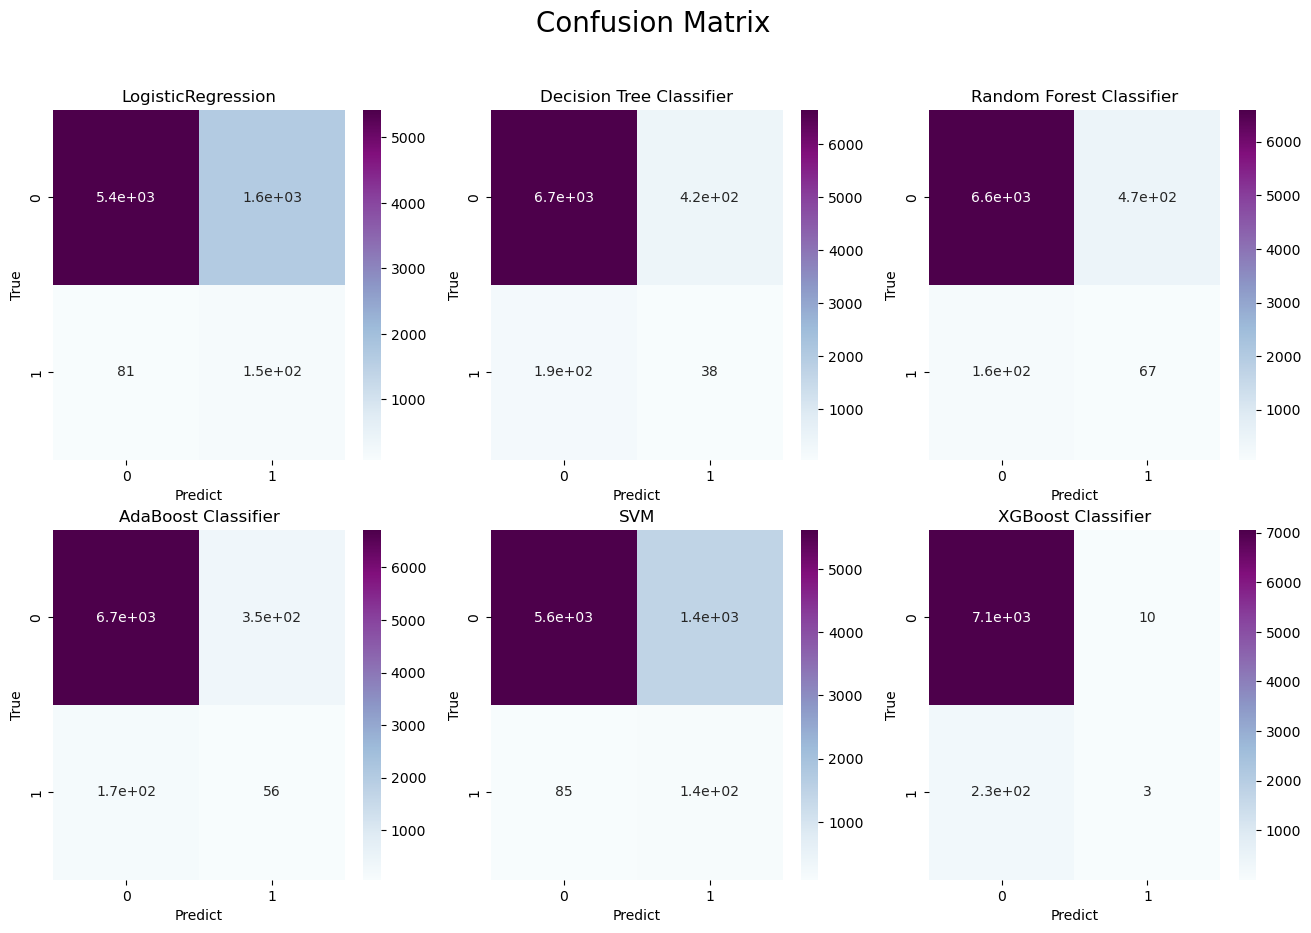

In [43]:
from sklearn.metrics import confusion_matrix

cm_lr= confusion_matrix(y_test, y_pred_lr, labels=[0, 1])
cm_svm= confusion_matrix(y_test, y_pred_svm, labels=[0, 1])
cm_dt= confusion_matrix(y_test, y_pred_dt, labels=[0, 1])
cm_xgbcls= confusion_matrix(y_test, y_pred_xgbcls, labels=[0, 1])
cm_rfc= confusion_matrix(y_test, y_pred_rfc, labels=[0, 1])
cm_ada= confusion_matrix(y_test, y_pred_ada, labels=[0, 1])

fig, axs = plt.subplots(nrows=2, ncols=3,figsize=(16, 10))

plt.subplot(231)
sns.heatmap(cm_lr,annot=True, cmap="BuPu")
plt.xlabel('Predict')
plt.ylabel('True')
plt.title('LogisticRegression') 


plt.subplot(232)
sns.heatmap(cm_dt,annot=True, cmap="BuPu")
plt.xlabel('Predict')
plt.ylabel('True')
plt.title('Decision Tree Classifier') 


plt.subplot(233)
sns.heatmap(cm_rfc,annot=True, cmap="BuPu")
plt.xlabel('Predict')
plt.ylabel('True')
plt.title('Random Forest Classifier') 


plt.subplot(234)
sns.heatmap(cm_ada,annot=True, cmap="BuPu")
plt.xlabel('Predict')
plt.ylabel('True')
plt.title('AdaBoost Classifier') 

plt.subplot(235)
sns.heatmap(cm_svm,annot=True, cmap="BuPu")
plt.xlabel('Predict')
plt.ylabel('True')
plt.title('SVM') 

plt.subplot(236)
sns.heatmap(cm_xgbcls,annot=True, cmap="BuPu")
plt.xlabel('Predict')
plt.ylabel('True')
plt.title('XGBoost Classifier') 

fig.suptitle("Confusion Matrix",fontsize=20)
plt.show()

In [44]:
models = [
    "LogisticRegression",
    "Decision Tree Classifier", 
    "Random Forest Classifier", 
    "AdaBoost Classifier", 
    "SVM",
    "XGBoost Classifier"
]

accuracy = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rfc),
    accuracy_score(y_test, y_pred_ada),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_xgbcls)
]
precision = [
    precision_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_dt),
    precision_score(y_test, y_pred_rfc),
    precision_score(y_test, y_pred_ada),
    precision_score(y_test, y_pred_svm),
    precision_score(y_test, y_pred_xgbcls)
]
recall = [
    recall_score(y_test, y_pred_lr),
    recall_score(y_test, y_pred_dt),
    recall_score(y_test, y_pred_rfc),
    recall_score(y_test, y_pred_ada),
    recall_score(y_test, y_pred_svm),
    recall_score(y_test, y_pred_xgbcls)  
]
f1= [
    f1_score(y_test, y_pred_lr),
    f1_score(y_test, y_pred_dt),
    f1_score(y_test, y_pred_rfc),
    f1_score(y_test, y_pred_ada),
    f1_score(y_test, y_pred_svm),
    f1_score(y_test, y_pred_xgbcls)
]
rocauc=[
    roc_auc_score(y_test, y_pred_lr),
    roc_auc_score(y_test, y_pred_dt),
    roc_auc_score(y_test, y_pred_rfc),
    roc_auc_score(y_test, y_pred_ada),
    roc_auc_score(y_test, y_pred_svm),
    roc_auc_score(y_test, y_pred_xgbcls)
]


models_score = pd.DataFrame(
    {"Models":models, 
     "Accuracy":accuracy, 
     "Precision":precision, 
     "Recall":recall, 
     "F1 Score":f1,
     "ROC AUC":rocauc
    }
)

models_score

,Models,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,LogisticRegression,0.763223,0.082451,0.646288,0.146245,0.706650
1,Decision Tree Classifier,0.916690,0.083516,0.165939,0.111111,0.553474
2,Random Forest Classifier,0.913127,0.124304,0.292576,0.174479,0.612903
3,AdaBoost Classifier,0.928200,0.137592,0.244541,0.176101,0.597444
4,SVM,0.789942,0.090452,0.628821,0.158155,0.711991
5,XGBoost Classifier,0.967662,0.230769,0.013100,0.024793,0.505843


## 4.3 Feature Importances

In [53]:
!pip install shap

In [54]:
import shap
shap.initjs()

In [59]:
explainer = shap.TreeExplainer(xgbcls)
shap_values = explainer.shap_values(feature_df)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [61]:
shap.force_plot(explainer.expected_value, shap_values[0,:], feature_df.iloc[0,:])

In [ ]:
shap.force_plot(explainer.expected_value, shap_values, feature_df)

shap.plots.force is slow for many thousands of rows, try subsampling your data.


In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, feature_df)